# Day 1: data cleaning

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./data/data.csv')
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


## column description:
footfall: The number of people or objects passing by the machine.

tempMode: The temperature mode or setting of the machine.

AQ: Air quality index near the machine.

USS: Ultrasonic sensor data, indicating proximity measurements.

CS: Current sensor readings, indicating the electrical current usage of the machine.

VOC: Volatile organic compounds level detected near the machine.

RP: Rotational position or RPM (revolutions per minute) of the machine parts.

IP: Input pressure to the machine.

Temperature: The operating temperature of the machine.

fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

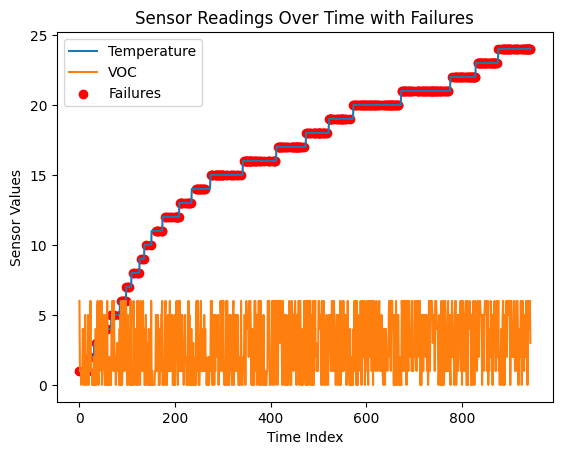

In [11]:
# Filter one or more sensors with 'fail' overlay
plt.plot(df.index, df['Temperature'], label='Temperature')
plt.plot(df.index, df['VOC'], label='VOC')
plt.scatter(df[df['fail']==1].index, df[df['fail']==1]['Temperature'], color='red', label='Failures')
plt.legend()
plt.title("Sensor Readings Over Time with Failures")
plt.xlabel("Time Index")
plt.ylabel("Sensor Values")
plt.show()

In [14]:
df.isnull().sum()
#no null values

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

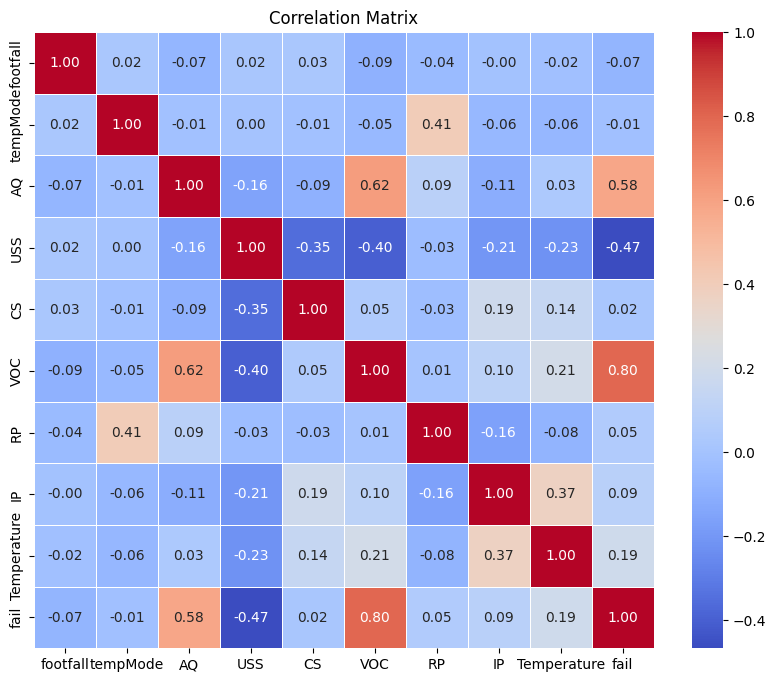

In [ ]:
# Computing correlation matrix
corr_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

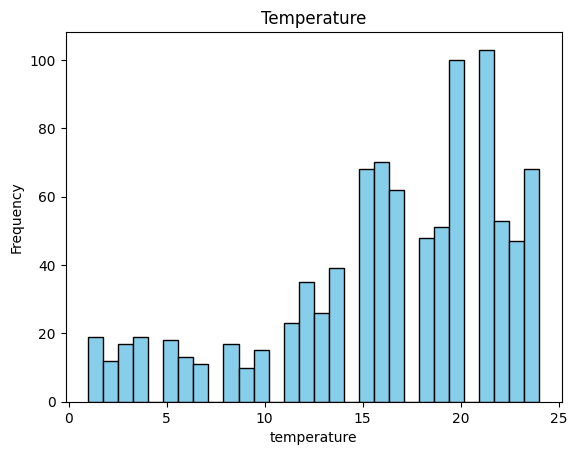

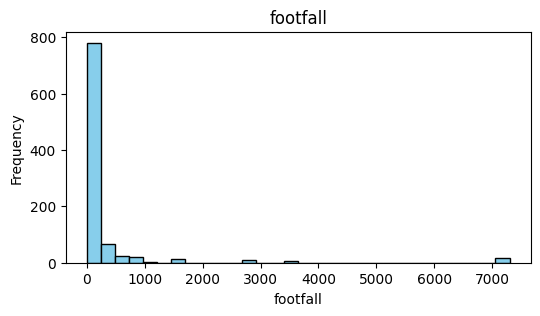

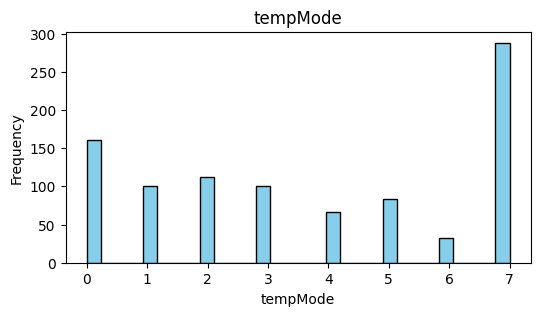

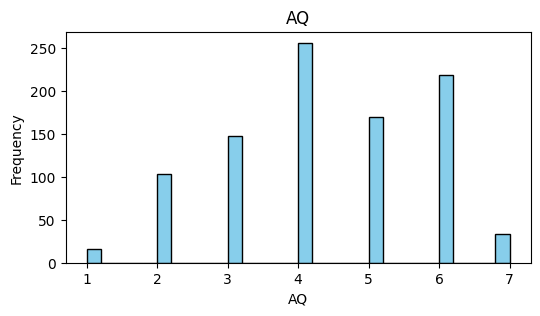

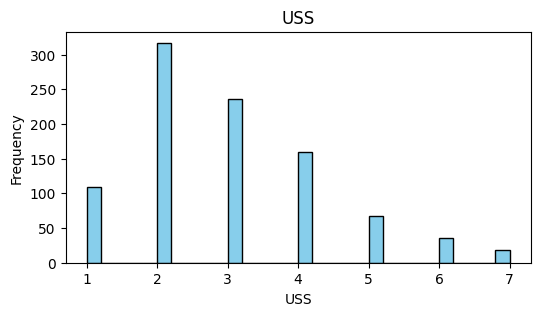

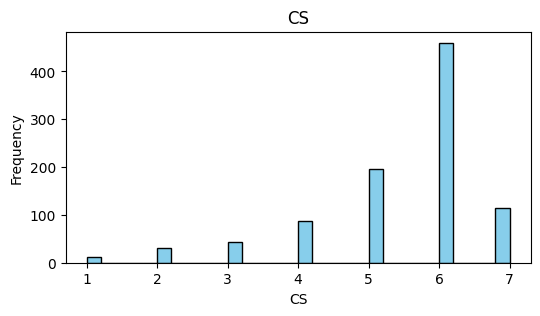

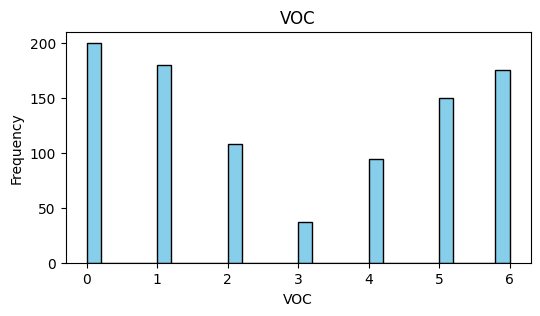

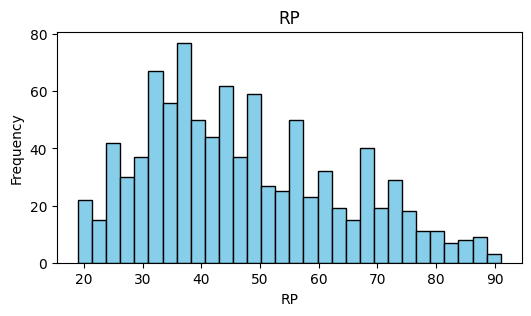

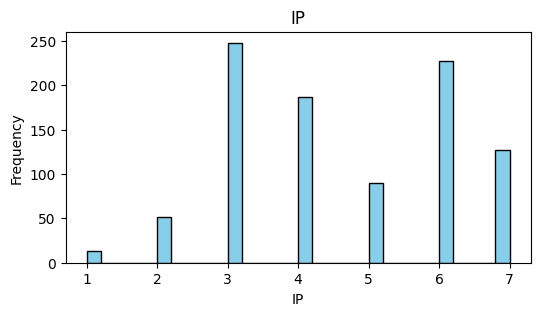

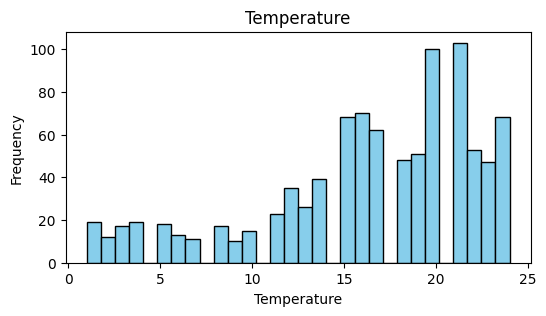

In [17]:
#histogram for Tool wear [min]
plt.hist(df['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature')
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.show()

# Visual check (histogram)
numeric_cols = df.select_dtypes(include='number').columns.drop('fail')
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

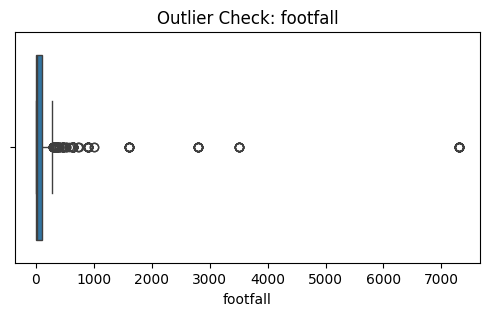

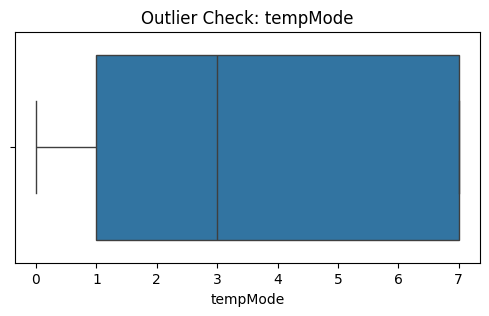

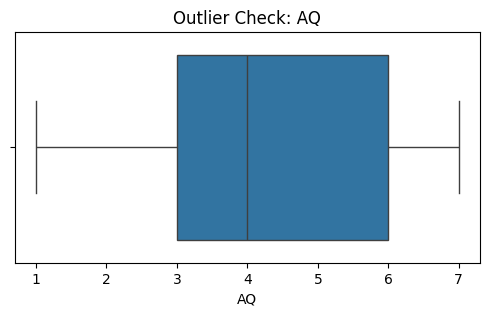

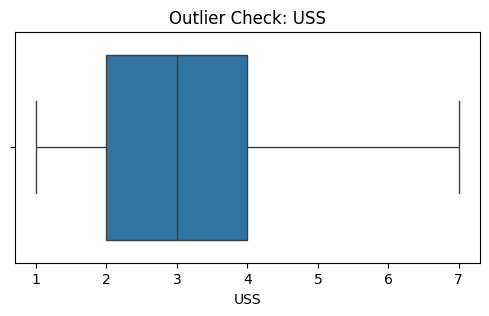

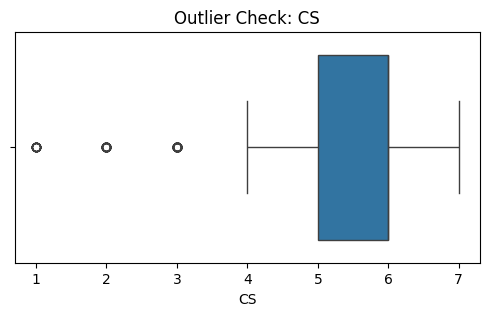

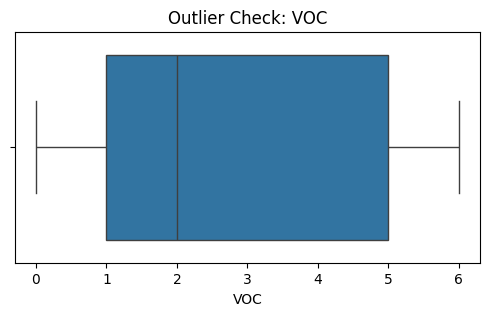

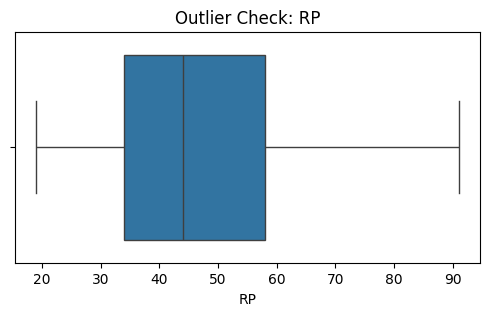

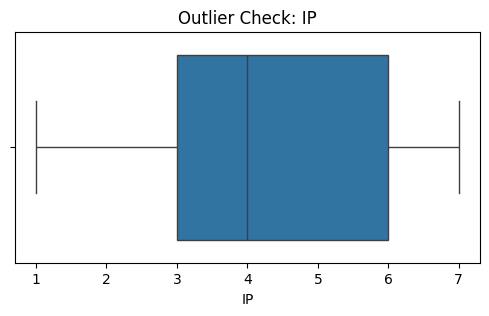

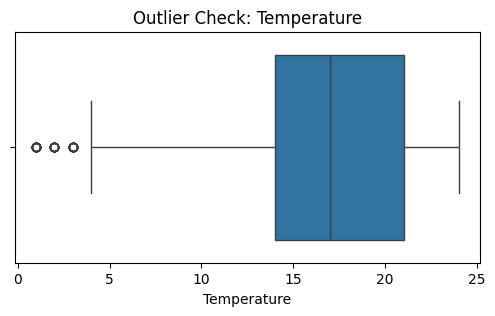

In [18]:
# Visual check (box plot)
numeric_cols = df.select_dtypes(include='number').columns.drop('fail')
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()